In [1]:
'''
Mount Google Drive to read images
Import OpenCV and other utils
Load a customized method to show images
'''
from google.colab import drive
drive.mount('/content/gdrive')

import numpy as np
import cv2
import matplotlib.pyplot as plt

#Utility method to show images
def show_images(images, titles, cols=1,plot=None):
    n_images = len(images)
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        if plot:
          plt.plot(image)
        else:
          plt.imshow(image,cmap='gray',vmin=0,vmax=255)
        a.set_title(title)
    if plot:
      fig.set_size_inches(np.array((6,2)) * n_images)
    else:
      fig.set_size_inches(np.array((5,5)) * n_images)
    plt.show()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#Read grayscale image
img = cv2.imread('/content/gdrive/My Drive/lena512.bmp',0)

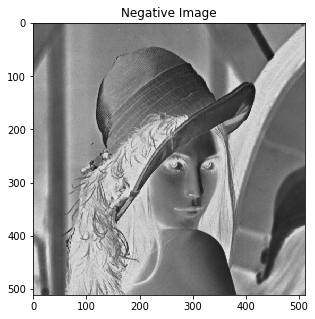

In [0]:
#Negative image - subtract pixel value from 255
neg = 255-img
show_images([neg],titles=['Negative Image'])

In [0]:
#Method to create normalized histogram
def normalized_hist(img):
  hist = [0]*256
  val = img.flatten()
  #Create histogram of 256 bins
  for x in val:
    hist[x] +=1
  #Normalize the histogram
  maxval = max(hist)
  for x in range(len(hist)):
    #Divide by the max frequency
    hist[x] = hist[x]/maxval
  return val,hist

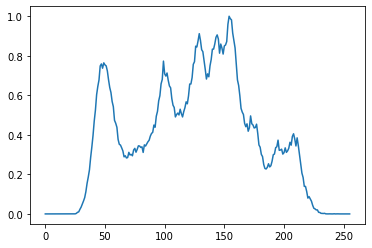

In [0]:
flat,hist = normalized_hist(img)
plt.plot(hist)

In [0]:
#Method to create cumulative histogram
def cum_hist(hist):
  cum_hist=[0]*256
  for x in range(1,len(hist)+1):
    #Sum values until current pixel
    cum_hist[x-1] = np.sum(hist[:x])
  #Normalize to get values between 0 and 255
  maxval = max(cum_hist)
  for x in range(len(cum_hist)):
    cum_hist[x] = np.floor((cum_hist[x]/maxval)*255)
  return cum_hist

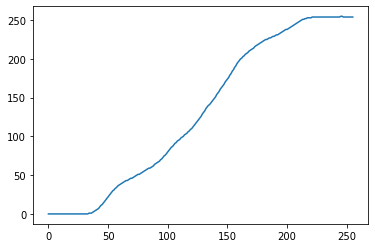

In [0]:
cum_hist = cum_hist(hist)
#Convert to 8 bit int value to avoid float values
cum_hist = np.asarray(cum_hist).astype('uint8')
plt.plot(cum_hist)

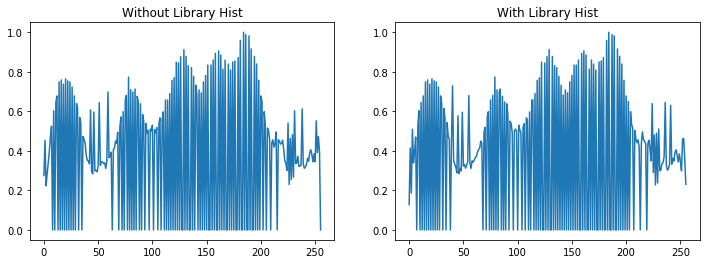

In [0]:
#For new equalized image, take the cumulative
#value for each pixel value of flattened image
new_img = cum_hist[flat]
#Reshape 1D array to original image size
new_img = np.reshape(new_img, img.shape)
#Compute the normalized histogram
_, new_hist = normalized_hist(new_img)
#Compute Histogram Equalization using
#OpenCV library method for checking
cv_img = cv2.equalizeHist(img)
_, cv_img_hist = normalized_hist(cv_img)
#Compare the histograms
show_images(images=[new_hist, cv_img_hist], titles=['Without Library Hist', 
                                              'With Library Hist'], plot=1)


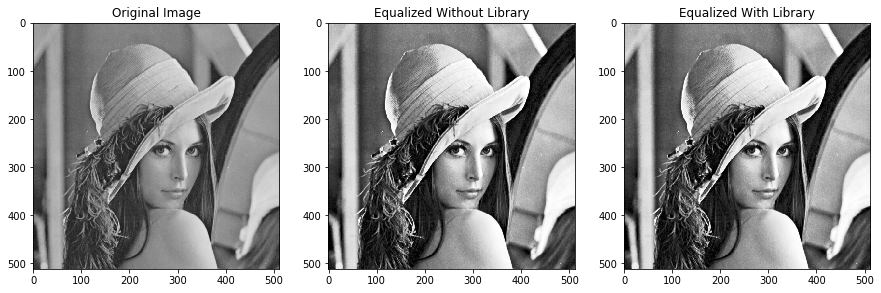

In [0]:
#Compare image generated with and without library methods
show_images([img, new_img, cv_img], titles=['Original Image',
      'Equalized Without Library', 'Equalized With Library'])

In [0]:
cv_img = cv2.equalizeHist(img)
hist = cv2.calcHist([cv_img],[0],None,[256],[0,256])

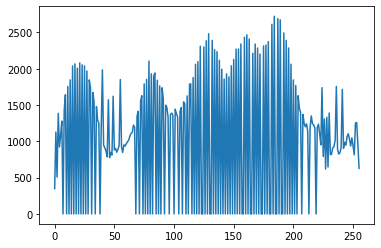

In [22]:
plt.plot(hist)

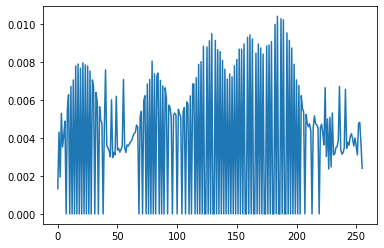

In [16]:
plt.plot(hisz)